## Problem Statement - 
* To predict whether the person will survive or not based on the diagonostic factors influencing Hepatitis

### Dataset: _Hepatitis_ 
* This dataset contains occurrences of hepatitis in people.

The dataset is obtained from the machine learning repository at UCI. It includes 155 records in two different classes which are die in 32 cases and live in 123 cases. The dataset includes 20 attributes (14 binary and 6 numerical attributes).

### **Attribute information:**

1. **target**: DIE (0), LIVE (1)
2. **age**: 10, 20, 30, 40, 50, 60, 70, 80
3. **gender**: male (1), female (2)

           ------ no = 2,   yes = 1 ------

4. **steroid**: no, yes 
5. **antivirals**: no, yes 
6. **fatique**: no, yes 
7. **malaise**: no, yes 
8. **anorexia**: no, yes 
9. **liverBig**: no, yes 
10. **liverFirm**: no, yes 
11. **spleen**: no, yes 
12. **spiders**: no, yes
13. **ascites**: no, yes 
14. **varices**: no, yes
15. **histology**: no, yes


16. **bilirubin**: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 -- 
17. **alk**: 33, 80, 120, 160, 200, 250 ---
18. **sgot**: 13, 100, 200, 300, 400, 500, ---
19. **albu**: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0, --- 
20. **protime**: 10, 20, 30, 40, 50, 60, 70, 80, 90, --- 

  * NA's are represented with "?"

### Identify Right Error Metrics

    Based on the business have to identify the right error metrics.

##### Confusion Matrix

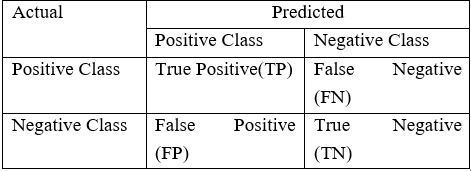

In [1]:
from IPython.display import Image

Image(filename ='Confusion_Matrix.png',width=500)

### Loading the required libraries

#### Import Required Libraries

In [2]:
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix

### from imblearn.over_sampling import SMOTE  ## Sampling Technique

import graphviz

# Code to ignore warnings
import warnings
warnings.filterwarnings("ignore")


##### 1. Read the HEPATITIS dataset

In [3]:
data = pd.read_csv("hepatitis_data.csv",na_values="?")

##### 2. Check the dimensions (rows and columns)

In [4]:
print('Dataset has ' + str(data.shape[0]) + ' rows, and ' + str(data.shape[1]) + ' columns')

Dataset has 155 rows, and 21 columns


##### 3. Check the datatype of each variable

In [5]:
data.dtypes

ID              int64
target          int64
age             int64
gender          int64
steroid       float64
antivirals      int64
fatigue       float64
malaise       float64
anorexia      float64
liverBig      float64
liverFirm     float64
spleen        float64
spiders       float64
ascites       float64
varices       float64
bili          float64
alk           float64
sgot          float64
albu          float64
protime       float64
histology       int64
dtype: object

## _Exploratory Data Analysis_

##### 4. Check the top 5 rows and observe the data

In [6]:
data.head(5)

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,1,30,2,1.0,2,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,1,50,1,1.0,2,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,3,1,78,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,4,1,31,1,NaN,1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,5,1,34,1,2.0,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


##### 5. Check basic summary statistics of the data

In [8]:
data.describe(include= "all")

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
count,155.000000,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,...,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,78.000000,0.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,...,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,44.888751,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,...,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,0.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,39.500000,1.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,78.000000,1.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,116.500000,1.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,155.000000,1.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


##### 6. Check the number of unique levels in each attribute

In [9]:
data.nunique()

ID            155
target          2
age            49
gender          2
steroid         2
antivirals      2
fatigue         2
malaise         2
anorexia        2
liverBig        2
liverFirm       2
spleen          2
spiders         2
ascites         2
varices         2
bili           34
alk            83
sgot           84
albu           29
protime        44
histology       2
dtype: int64

### Target attribute distribution

##### 7. Check for value counts in target variable

In [10]:
data.target.value_counts()

1    123
0     32
Name: target, dtype: int64

##### 8. Check for distribution of values in target variable

In [12]:
data.target.value_counts(normalize=True)

1    0.793548
0    0.206452
Name: target, dtype: float64

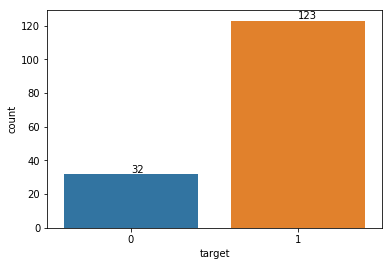

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

y_count=sns.countplot(x='target',data=data)        
# Shows the count of observations in each categorical bin using bars

for p in y_count.patches:
    height = p.get_height()
    # Add text to the axes
    y_count.text(p.get_x()+p.get_width()/2, height + 1, height)
# The y_count.text method takes an x position, a y position and a string

plt.show()

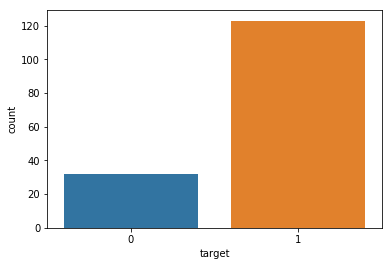

In [14]:
sns.countplot(x='target',data=data) 

## _Data Pre-processing_

##### 9. Drop column(s) which are not significant

In [17]:
data.drop(['ID'] , axis = 1 , inplace=True)

##### 10. Check for top 5 rows

In [18]:
print(data.shape)
data.head()

(155, 20)


,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,1,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,1,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,1,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


##### 11. Identify the Categorical Columns and store them in a variable cat_cols and numerical into num_cols

In [19]:
num_cols = ["age", "bili", "alk", "sgot", "protime"]
cat_cols = ['gender', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liverBig', 
            'liverFirm', 'spleen', 'spiders', 'ascites', 'varices', 'histology']

##### 12. Convert all the categorical columns to appropriate data type 

In [20]:
data[cat_cols] = data[cat_cols].astype("category")

In [21]:
data.dtypes

target           int64
age              int64
gender        category
steroid       category
antivirals    category
fatigue       category
malaise       category
anorexia      category
liverBig      category
liverFirm     category
spleen        category
spiders       category
ascites       category
varices       category
bili           float64
alk            float64
sgot           float64
albu           float64
protime        float64
histology     category
dtype: object

##### 14. Split the data into X and y

In [22]:
X = data.drop(['target'] , axis = 1)

In [23]:
y = data["target"]

In [24]:
print(X.shape, y.shape)

(155, 19) (155,)


##### 15. Split the data into X_train, X_test, y_train, y_test with test_size = 0.20

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,
                                                    random_state=12345,stratify= y)

##### 16. Print the shape of X_train, X_test, y_train, y_test

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 19)
(31, 19)
(124,)
(31,)


##### 17. Check for distribution of target values in y_train

In [37]:
print(y_train.value_counts())

1    98
0    26
Name: target, dtype: int64


In [38]:
print(y_train.value_counts(normalize=True)*100)

1    79.032258
0    20.967742
Name: target, dtype: float64


##### 18. Check for distribution of target values in y_test

In [39]:
print(y_test.value_counts(normalize=True)*100)

1    80.645161
0    19.354839
Name: target, dtype: float64


### Handling Missing Data

##### 19. Check null values in train and test

In [40]:
# null values in train
X_train.isnull().sum()

age            0
gender         0
steroid        0
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig       7
liverFirm      8
spleen         4
spiders        4
ascites        4
varices        4
bili           6
alk           25
sgot           4
albu          14
protime       56
histology      0
dtype: int64

In [41]:
# null values in test
X_test.isnull().sum()

age            0
gender         0
steroid        1
antivirals     0
fatigue        0
malaise        0
anorexia       0
liverBig       3
liverFirm      3
spleen         1
spiders        1
ascites        1
varices        1
bili           0
alk            4
sgot           0
albu           2
protime       11
histology      0
dtype: int64

### Missing value Imputation

##### 20. Impute the Categorical Columns with mode and Numerical columns with median

In [42]:
df_cat_train = X_train[cat_cols]
df_cat_test = X_test[cat_cols]

In [43]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy = "most_frequent")  ##Mode
cat_imputer.fit(df_cat_train)

SimpleImputer(strategy='most_frequent')

In [44]:
df_cat_train = pd.DataFrame(cat_imputer.transform(df_cat_train), columns=cat_cols)

In [45]:
df_cat_test = pd.DataFrame(cat_imputer.transform(df_cat_test), columns=cat_cols)

In [46]:
df_num_train = X_train[num_cols]
df_num_test = X_test[num_cols]

In [47]:
num_imputer = SimpleImputer(strategy ="median")
num_imputer.fit(df_num_train)

SimpleImputer(strategy='median')

In [48]:
df_num_train = pd.DataFrame (num_imputer.transform(df_num_train), columns= num_cols)

In [49]:
df_num_test =  pd.DataFrame(num_imputer.transform(df_num_test), columns=num_cols)

In [50]:
# Combine numeric and categorical in train
X_train = pd.concat([df_num_train, df_cat_train], axis = 1)

# Combine numeric and categorical in test
X_test = pd.concat([df_num_test, df_cat_test], axis = 1)

In [51]:
X_train.isna().sum()

age           0
bili          0
alk           0
sgot          0
protime       0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
histology     0
dtype: int64

In [52]:
X_test.isna().sum()

age           0
bili          0
alk           0
sgot          0
protime       0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
histology     0
dtype: int64

### Encoding Categorical to Numeric -  Dummification

    'pandas.get_dummies' To convert convert categorical variable into dummy/indicator variables

#### 21. Dummify the Categorical columns

Creating dummy variables -

    If we have k levels in a category, then we create k-1 dummy variables as the last one would be redundant. So we use the parameter drop_first in pd.get_dummies function that drops the first level in each of the category

In [53]:
## Convert Categorical Columns to Dummies
# Train
X_train = pd.get_dummies(X_train, columns=cat_cols,drop_first=True)

# Test
X_test = pd.get_dummies(X_test, columns=cat_cols,drop_first=True)

In [54]:
X_train.columns

Index(['age', 'bili', 'alk', 'sgot', 'protime', 'gender_2.0', 'steroid_2.0',
       'antivirals_2.0', 'fatigue_2.0', 'malaise_2.0', 'anorexia_2.0',
       'liverBig_2.0', 'liverFirm_2.0', 'spleen_2.0', 'spiders_2.0',
       'ascites_2.0', 'varices_2.0', 'histology_2.0'],
      dtype='object')

In [55]:
X_test.columns

Index(['age', 'bili', 'alk', 'sgot', 'protime', 'gender_2.0', 'steroid_2.0',
       'antivirals_2.0', 'fatigue_2.0', 'malaise_2.0', 'anorexia_2.0',
       'liverBig_2.0', 'liverFirm_2.0', 'spleen_2.0', 'spiders_2.0',
       'ascites_2.0', 'varices_2.0', 'histology_2.0'],
      dtype='object')

#### 22. Scale the numeric attributes ["age", "bili", "alk", "sgot", "albu", "protime"]

In [56]:
#num_cols = ["age", "bili", "alk", "sgot", "albu", "protime"]
scaler = StandardScaler()

scaler.fit(X_train[num_cols])

# scale on train
X_train[num_cols] =scaler.transform(X_train[num_cols])

# scale on test
X_test[num_cols] = scaler.transform(X_test[num_cols])



In [57]:
X_train.head()

,age,bili,alk,sgot,protime,gender_2.0,steroid_2.0,antivirals_2.0,fatigue_2.0,malaise_2.0,anorexia_2.0,liverBig_2.0,liverFirm_2.0,spleen_2.0,spiders_2.0,ascites_2.0,varices_2.0,histology_2.0
0,-0.275049,-0.562549,0.650444,-0.182842,0.914697,0,1,0,0,0,0,1,1,1,0,1,1,0
1,0.440463,0.222992,-0.288805,-0.716728,-0.864704,0,1,1,0,0,1,1,0,1,1,0,0,1
2,0.201959,-0.405441,0.891277,-0.301483,-1.151704,0,0,1,0,0,1,1,1,0,1,1,0,1
3,-1.070063,0.144438,-1.300304,0.505278,-0.864704,0,0,1,0,0,0,1,0,1,1,1,1,0
4,-1.070063,-0.326887,-0.312889,-0.716728,-0.003703,0,1,1,0,0,0,1,1,1,0,0,1,1


In [58]:
X_test.head()

,age,bili,alk,sgot,protime,gender_2.0,steroid_2.0,antivirals_2.0,fatigue_2.0,malaise_2.0,anorexia_2.0,liverBig_2.0,liverFirm_2.0,spleen_2.0,spiders_2.0,ascites_2.0,varices_2.0,histology_2.0
0,-1.070063,-0.562549,-0.312889,-0.586222,-0.003703,0,1,1,1,1,1,1,1,1,1,1,1,0
1,-0.672556,-0.326887,-1.252138,0.113762,-0.061103,0,1,1,1,1,1,1,1,1,1,1,1,0
2,-0.434052,0.222992,4.744606,-0.242162,-0.003703,0,0,1,0,0,0,0,0,1,0,1,0,1
3,-1.149564,0.772872,1.686026,1.739149,0.283297,0,0,1,0,1,1,1,0,1,1,1,1,1
4,1.950989,-0.169778,0.096527,-0.325211,-0.003703,0,1,1,0,1,1,1,1,1,1,1,1,0


In [59]:
X_train.dtypes

age               float64
bili              float64
alk               float64
sgot              float64
protime           float64
gender_2.0          uint8
steroid_2.0         uint8
antivirals_2.0      uint8
fatigue_2.0         uint8
malaise_2.0         uint8
anorexia_2.0        uint8
liverBig_2.0        uint8
liverFirm_2.0       uint8
spleen_2.0          uint8
spiders_2.0         uint8
ascites_2.0         uint8
varices_2.0         uint8
histology_2.0       uint8
dtype: object

## MODEL BUILDING

## SVM (Linear  and RBF Models)

In [60]:
from sklearn.svm import SVC   #,SVR

In [61]:
# Create a SVC classifier using a linear kernel
linear_svm = SVC(kernel='linear', C=1, random_state=0) #  poly - degree , rbf - Gamma

In [62]:
# Train the classifier
linear_svm.fit(X=X_train, y= y_train)

SVC(C=1, kernel='linear', random_state=0)

In [63]:
## Predict
train_predictions = linear_svm.predict(X_train)
test_predictions = linear_svm.predict(X_test)

### Train data accuracy
from sklearn.metrics import accuracy_score,f1_score

print("TRAIN Conf Matrix : \n", confusion_matrix(y_train, train_predictions))
print("\nTRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(y_train,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '0'",f1_score(y_train,train_predictions,pos_label=0))

### Test data accuracy
print("\n\n--------------------------------------\n\n")

print("TEST Conf Matrix : \n", confusion_matrix(y_test, test_predictions))
print("\nTEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(y_test,test_predictions,pos_label=1))
print("\nTest data f1-score for class '0'",f1_score(y_test,test_predictions,pos_label=0))

TRAIN Conf Matrix : 
 [[20  6]
 [ 5 93]]

TRAIN DATA ACCURACY 0.9112903225806451

Train data f1-score for class '1' 0.9441624365482234

Train data f1-score for class '0' 0.7843137254901961


--------------------------------------


TEST Conf Matrix : 
 [[ 2  4]
 [ 2 23]]

TEST DATA ACCURACY 0.8064516129032258

Test data f1-score for class '1' 0.8846153846153846

Test data f1-score for class '0' 0.4


####  Non Linear SVM (RBF)

Radial Basis Function is a commonly used kernel in SVC:<br>

<img src="rbf_kernel.png">

where <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow class="MJX-TeXAtom-ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mrow class="MJX-TeXAtom-ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mrow class="MJX-TeXAtom-ORD">
    <mi mathvariant="bold">x</mi>
      <sub>i</sub>
  </mrow>
  <mo>&#x2212;<!-- − --></mo>
  <mrow class="MJX-TeXAtom-ORD">
    <msup>
      <mi mathvariant="bold">x</mi>
      <sub>j</sub>
    </msup>
  </mrow>
  <mrow class="MJX-TeXAtom-ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msup>
    <mrow class="MJX-TeXAtom-ORD">
      <mo stretchy="false">|</mo>
    </mrow>
    <mrow class="MJX-TeXAtom-ORD">
      <sup>2</sup>
    </mrow>
  </msup>
</math>  is the squared Euclidean distance between two data points x<sub>i</sub> and x<sub>j</sub>

It is only important to know that an SVC classifier using an RBF kernel has two parameters: gamma and C.

<strong>Gamma:</strong>

- Gamma is a parameter of the RBF kernel and can be thought of as the ‘spread’ of the kernel and therefore the decision region. When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad. When gamma is high, the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points.

<strong>C:</strong>

- C is a parameter of the SVC learner and is the penalty for misclassifying a data point. When C is small, the classifier is okay with misclassified data points (high bias, low variance). When C is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards avoid any misclassified data points (low bias, high variance).


<strong>Kernel Trick:</strong><br>
Image you have a two-dimensional non-linearly separable dataset, you would like to classify it using SVM. It looks like not possible because the data is not linearly separable. However, if we transform the two-dimensional data to a higher dimension, say, three-dimension or even ten-dimension, we would be able to find a hyperplane to separate the data.

<img src="kernel_trick.png">

The problem is, if we have a large dataset containing, say, millions of examples, the transformation will take a long time to run.<br>
To solve this problem, we actually only care about the result of the dot product (x<sub>i</sub>.x<sub>j</sub>)<br>
<br>If there is a function which could calculate the dot product and the result is the same as when we transform the data into higher dimension, it would be fantastic. This function is called a kernel function.<br>
<br>In essence, what the kernel trick does for us is to offer a more efficient and less expensive way to transform data into higher dimensions.

### Polynomial Kernel

In [64]:
from sklearn.svm import SVC   #,SVR

In [80]:
# Create a SVC classifier using a linear kernel
poly_svm = SVC(kernel='poly', degree = 2 , C=1, random_state=0) #  poly - degree , rbf - Gamma

In [81]:
%time

# Train the classifier

poly_svm.fit(X=X_train, y= y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


SVC(C=1, degree=2, kernel='poly', random_state=0)

In [82]:
## Predict
train_predictions = poly_svm.predict(X_train)
test_predictions = poly_svm.predict(X_test)

### Train data accuracy
from sklearn.metrics import accuracy_score,f1_score

print("TRAIN Conf Matrix : \n", confusion_matrix(y_train, train_predictions))
print("\nTRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(y_train,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '0'",f1_score(y_train,train_predictions,pos_label=0))

### Test data accuracy
print("\n\n--------------------------------------\n\n")

print("TEST Conf Matrix : \n", confusion_matrix(y_test, test_predictions))
print("\nTEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(y_test,test_predictions,pos_label=1))
print("\nTest data f1-score for class '0'",f1_score(y_test,test_predictions,pos_label=0))

TRAIN Conf Matrix : 
 [[20  6]
 [ 0 98]]

TRAIN DATA ACCURACY 0.9516129032258065

Train data f1-score for class '1' 0.9702970297029703

Train data f1-score for class '0' 0.8695652173913044


--------------------------------------


TEST Conf Matrix : 
 [[ 2  4]
 [ 0 25]]

TEST DATA ACCURACY 0.8709677419354839

Test data f1-score for class '1' 0.9259259259259259

Test data f1-score for class '0' 0.5


In [73]:
## Create an SVC object and print it to see the arguments
svc = SVC(kernel='rbf', random_state=0, gamma=0.01, C=1)
svc

SVC(C=1, gamma=0.01, random_state=0)

In [74]:
## Train the model
svc.fit(X=X_train, y= y_train)

SVC(C=1, gamma=0.01, random_state=0)

In [75]:
## Predict
train_predictions = svc.predict(X_train)
test_predictions = svc.predict(X_test)

### Train data accuracy

print("TRAIN Conf Matrix : \n", confusion_matrix(y_train, train_predictions))
print("\nTRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(y_train,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '0'",f1_score(y_train,train_predictions,pos_label=0))

### Test data accuracy
print("\n\n--------------------------------------\n\n")

print("TEST Conf Matrix : \n", confusion_matrix(y_test, test_predictions))
print("\nTEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(y_test,test_predictions,pos_label=1))
print("\nTest data f1-score for class '0'",f1_score(y_test,test_predictions,pos_label=0))

TRAIN Conf Matrix : 
 [[ 4 22]
 [ 0 98]]

TRAIN DATA ACCURACY 0.8225806451612904

Train data f1-score for class '1' 0.8990825688073394

Train data f1-score for class '0' 0.2666666666666667


--------------------------------------


TEST Conf Matrix : 
 [[ 0  6]
 [ 0 25]]

TEST DATA ACCURACY 0.8064516129032258

Test data f1-score for class '1' 0.8928571428571428

Test data f1-score for class '0' 0.0


### SVM with Grid Search for Paramater Tuning

In [88]:
list(range(1 ,10 ))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [85]:
## Use Grid Search for parameter tuning

from sklearn.model_selection import GridSearchCV

svc_grid = SVC()
 
param_grid = { 
                'C': [0.001, 0.01, 0.1, 1, 10, 100 ],
                'gamma': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
                'kernel':['linear', 'rbf', 'poly' ]
             }

svc_cv_grid = GridSearchCV(estimator = svc_grid, param_grid = param_grid, cv = 5)

In [84]:
6 * 8 * 3 * 5

720

In [89]:
## Fit the grid search model
%time svc_cv_grid.fit(X=X_train, y=y_train)

### Cores ## Neural Engine  ### GPU (NVIDIA) -CUDA  

CPU times: user 5.72 s, sys: 103 ms, total: 5.82 s
Wall time: 6.08 s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']})

In [90]:
# Get the best parameters
svc_cv_grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [91]:
#svc_cv_grid.grid_scores_
svc_cv_grid.cv_results_

{'mean_fit_time': array([0.00920439, 0.0052412 , 0.0035892 , 0.00411296, 0.00391955,
        0.00406594, 0.00417109, 0.00382552, 0.00398879, 0.00372314,
        0.00381842, 0.00433607, 0.00505424, 0.00448465, 0.00401597,
        0.00571661, 0.00492387, 0.00511098, 0.00471263, 0.00486565,
        0.00411706, 0.00446224, 0.00425916, 0.00805092, 0.01193743,
        0.00558772, 0.00429282, 0.00572739, 0.00536656, 0.00474501,
        0.00387383, 0.00391717, 0.00409036, 0.00455642, 0.00410938,
        0.0038022 , 0.00393896, 0.00373693, 0.00404716, 0.00377383,
        0.00428362, 0.00374918, 0.00344906, 0.00431962, 0.00389256,
        0.00379295, 0.00484657, 0.00379205, 0.00368514, 0.00384188,
        0.00365081, 0.00361896, 0.00391402, 0.00382276, 0.00379767,
        0.00376453, 0.00363178, 0.00390205, 0.00401602, 0.0038414 ,
        0.00459771, 0.00426941, 0.00395446, 0.00382457, 0.00418553,
        0.00411005, 0.00401983, 0.00482259, 0.00385494, 0.00412431,
        0.00448179, 0.00418487,

In [92]:
## Predict
train_predictions = svc_cv_grid.predict(X_train)
test_predictions = svc_cv_grid.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class '1'",f1_score(y_train,train_predictions,pos_label=1))
print("\nTrain data f1-score for class '0'",f1_score(y_train,train_predictions,pos_label=0))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class '1'",f1_score(y_test,test_predictions,pos_label=1))
print("\nTest data f1-score for class '0'",f1_score(y_test,test_predictions,pos_label=0))

TRAIN DATA ACCURACY 0.9516129032258065

Train data f1-score for class '1' 0.9702970297029703

Train data f1-score for class '0' 0.8695652173913044


--------------------------------------


TEST DATA ACCURACY 0.8709677419354839

Test data f1-score for class '1' 0.9259259259259259

Test data f1-score for class '0' 0.5


# <center> Hepatitis Survival using Ensembles </center>

___

Ensemble refers to aggregation of predictions of different models based on weighted average or majority vote. Models can be different in their selection of sample set, feature set, hyperparameter and/or model family.
It is used with tree models because decision trees are high variance models i.e. small change in data impacts the decision boundary considerably. Ensembles can be used with any classifier.

<img src="image/EnsembleImage.jpeg" alt="https://becominghuman.ai/ensemble-learning-bagging-and-boosting-d20f38be9b1e" width="500" height="400">


Ensembles can be in form of Bagging or Boosting.

<img src="image/bb3.png" alt="https://www.kdnuggets.com/" width="700" height="700">

___


**The goal is to classify whether the hepatitis patient will survive or not.**
___


##  Random Forest



#### Let us see the details of the Random Forest in Sklearn 
* class sklearn.ensemble.RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)



* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True 

**Parameters:**

* **n_estimators** : integer, optional (default=10)
    The number of trees in the forest.The default value of n_estimators will change from 10 in version 0.20 to 100 in version 0.22.

* **criterion** : string, optional (default=”gini”)
    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

* **max_depth** : integer or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

* **min_samples_split** : int, float, optional (default=2)
    The minimum number of samples required to split an internal node:

    If int, then consider min_samples_split as the minimum number.
    If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
    
* **min_samples_leaf** : int, float, optional (default=1) The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

    If int, then consider min_samples_leaf as the minimum number. If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

* **max_features** : int, float, string or None, optional (default=”auto”)
    The number of features to consider when looking for the best split


In [93]:
# Import Randomforest Library

from sklearn.ensemble import RandomForestClassifier

Important Hyperparameters
Hyperparameters are used in random forests to either enhance the performance and predictive power of models or to make the model faster.

Following hyperparameters increases the predictive power:

1. n_estimators– number of trees the algorithm builds before averaging the predictions.

2. max_features– maximum number of features random forest considers splitting a node.

3. mini_sample_leaf– determines the minimum number of leaves required to split an internal node.

Following hyperparameters increases the speed:

1. n_jobs– it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor but if the value is -1 there is no limit.

2. random_state– controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and if it has been given the same hyperparameters and the same training data.

3. oob_score – OOB means out of the bag. It is a random forest cross-validation method. In this one-third of the sample is not used to train the data instead used to evaluate its performance. These samples are called out of bag samples.

 


In [94]:
classifier_rf = RandomForestClassifier()

### Train Model

In [95]:
classifier_rf.fit(X_train,y_train)

RandomForestClassifier()

### Display Tree

In [96]:
classifier_rf.classes_

array([0, 1])

In [97]:
train_pred = classifier_rf.predict(X_train)
test_pred = classifier_rf.predict(X_test)

In [98]:
train_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0])

### Evaluate

In [102]:
def evaluate_model(act, pred):
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred))
    print("Precision: ", precision_score(act, pred)) 
    print("F1-score -1- ",f1_score(act,pred,pos_label =1))
    print("F1-score -0-" ,f1_score(act,pred,pos_label =0))

In [103]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test,test_pred)

--Train--
Confusion Matrix 
 [[26  0]
 [ 0 98]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
F1-score -1-  1.0
F1-score -0- 1.0
--Test--
Confusion Matrix 
 [[ 2  4]
 [ 3 22]]
Accurcay :  0.7741935483870968
Recall   :  0.88
Precision:  0.8461538461538461
F1-score -1-  0.8627450980392156
F1-score -0- 0.3636363636363636


### List important features

In [104]:
importances = classifier_rf.feature_importances_
importances

array([0.07277445, 0.16556157, 0.07983068, 0.0757419 , 0.11591695,
       0.01644065, 0.01327818, 0.00644436, 0.0195641 , 0.03171456,
       0.02009732, 0.01147923, 0.02996224, 0.04011626, 0.06586218,
       0.11642222, 0.05401788, 0.06477526])

In [106]:
np.argsort(importances)[::-1]

array([ 1, 15,  4,  2,  3,  0, 14, 17, 16, 13,  9, 12, 10,  8,  5,  6, 11,
        7])

In [107]:
indices = np.argsort(importances)[::-1]
ind_attr_names = X_train.columns
pd.DataFrame([ind_attr_names[indices], np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,bili,ascites_2.0,protime,alk,sgot,age,spiders_2.0,histology_2.0,varices_2.0,spleen_2.0,malaise_2.0,liverFirm_2.0,anorexia_2.0,fatigue_2.0,gender_2.0,steroid_2.0,liverBig_2.0,antivirals_2.0
1,0.165562,0.116422,0.115917,0.079831,0.075742,0.072774,0.065862,0.064775,0.054018,0.040116,0.031715,0.029962,0.020097,0.019564,0.016441,0.013278,0.011479,0.006444


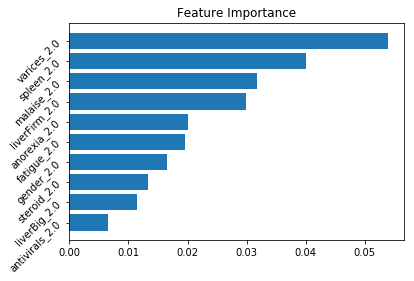

In [110]:
# Ploting the top 10 features

importances = classifier_rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.barh(range(X_train.shape[1])[0:10], importances[indices][0:10])

# Add feature names as x-axis labels
plt.yticks(range(X_train.shape[1])[0:10], names[0:10], rotation =45)

# Show plot
plt.show()

## Hyper-parameter tuning using Grid Search and Cross Validation

### Cross validation

![](grid_search_cross_validation.png)

### Two type of Machine Learning Model Parameters

In a machine learning model, there are 2 types of parameters:

* __`Model Parameters`__: These are the parameters that the model learn during training. These are also called fitted parameters.
* __`Hyperparameters`__: These are adjustable parameters that must be tuned in order to obtain a model with optimal performance. These are fed into the model during training.




### Parameters to test

In [111]:
param_grid = {#"n_estimators" : [50,60],
              "criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5],
              "max_depth": [None, 7],
              "min_samples_leaf": [1, 5],
              "ccp_alpha":[0.0001,0.001,0.01,0.1]
             }

### Instantiate Decision Tree

In [112]:
rfclf2 = RandomForestClassifier()

### GridSearchCV 

In [113]:
rfclf_grid = GridSearchCV(rfclf2, param_grid, cv=3)

### Train

In [114]:
rfclf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.0001, 0.001, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 7], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5]})

### Best Params

In [115]:
rfclf_grid.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### Predict 

In [116]:
train_pred = rfclf_grid.predict(X_train)
test_pred = rfclf_grid.predict(X_test)

### Evaluate

In [117]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[26  0]
 [ 0 98]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
F1-score -1-  1.0
F1-score -0- 1.0
--Test--
Confusion Matrix 
 [[ 2  4]
 [ 2 23]]
Accurcay :  0.8064516129032258
Recall   :  0.92
Precision:  0.8518518518518519
F1-score -1-  0.8846153846153846
F1-score -0- 0.4


## Building RandomForest Model using Variable Importance

In [118]:
importances = rfclf_grid.best_estimator_.feature_importances_
importances

array([0.09340595, 0.16618934, 0.07358601, 0.08832906, 0.10314939,
       0.0148292 , 0.01919321, 0.00647484, 0.02743973, 0.02248651,
       0.02517776, 0.01267098, 0.03174424, 0.03238283, 0.07915967,
       0.08479994, 0.0392629 , 0.07971844])

In [119]:
indices = np.argsort(importances)[::-1]
print(indices)

[ 1  4  0  3 15 17 14  2 16 13 12  8 10  9  6  5 11  7]


In [120]:
select = indices[0:5]
print(select)

[ 1  4  0  3 15]


### Instantiate Model

In [121]:
rfclf4 = RandomForestClassifier(criterion= 'entropy', 
                                max_depth= 3, 
                                min_samples_leaf= 1,
                                min_samples_split= 2,
                                ccp_alpha=0.001)

### Train the model

In [122]:
rfclf4 = rfclf4.fit(X_train.values[:,select], y_train)

### Predict

In [123]:
train_pred = rfclf4.predict(X_train.values[:,select])
test_pred = rfclf4.predict(X_test.values[:,select])

### Evaluate

In [124]:
print("--Train--")
evaluate_model(y_train,train_pred)
print("--Test--")
evaluate_model(y_test,test_pred)

--Train--
Confusion Matrix 
 [[13 13]
 [ 0 98]]
Accurcay :  0.8951612903225806
Recall   :  1.0
Precision:  0.8828828828828829
F1-score -1-  0.937799043062201
F1-score -0- 0.6666666666666666
--Test--
Confusion Matrix 
 [[ 2  4]
 [ 2 23]]
Accurcay :  0.8064516129032258
Recall   :  0.92
Precision:  0.8518518518518519
F1-score -1-  0.8846153846153846
F1-score -0- 0.4
